In [1]:
from src.utils import *
from pathlib import Path
from nltk.probability import FreqDist
from src.preprocess import clean_tokens, date_to_astral, ASTRAL_DATES
from matplotlib import pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from functools import reduce

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
SELECTED_SIGN = list(ASTRAL_DATES.keys())
SELECTED_SIGN = [['Taurus', 'Sagittarius']]
DOCS_PATH = Path(f'data/lg/spacy.jsonl')

In [3]:
docs = read_jsonl(DOCS_PATH)

In [4]:
df = pd.DataFrame(docs, columns=['path', 'birthDate', 'birthPlace', 'deathDate'])
df.head()

,path,birthDate,birthPlace,deathDate
0,http://dbpedia.org/resource/Captain_Raju,1950-06-27,http://dbpedia.org/resource/Travancore-Cochin,2018-09-17
1,http://dbpedia.org/resource/Gerd_Audehm,1968-08-14,http://dbpedia.org/resource/Bezirk_Cottbus,None
2,http://dbpedia.org/resource/Saana_Saarteinen,1993-02-11,http://dbpedia.org/resource/Finland_Fed_Cup_team,None
3,http://dbpedia.org/resource/Melymel_(rapper),1988-05-06,http://dbpedia.org/resource/Santo_Domingo,None
4,http://dbpedia.org/resource/Samuel_Adler_(rabbi),1809-12-03,"http://dbpedia.org/resource/Worms,_Germany",1891-06-09


In [5]:
df['astral_sign'] = df.birthDate.apply(date_to_astral)
df.head()

,path,birthDate,birthPlace,deathDate,astral_sign
0,http://dbpedia.org/resource/Captain_Raju,1950-06-27,http://dbpedia.org/resource/Travancore-Cochin,2018-09-17,Cancer
1,http://dbpedia.org/resource/Gerd_Audehm,1968-08-14,http://dbpedia.org/resource/Bezirk_Cottbus,None,Leo
2,http://dbpedia.org/resource/Saana_Saarteinen,1993-02-11,http://dbpedia.org/resource/Finland_Fed_Cup_team,None,Aquarius
3,http://dbpedia.org/resource/Melymel_(rapper),1988-05-06,http://dbpedia.org/resource/Santo_Domingo,None,Taurus
4,http://dbpedia.org/resource/Samuel_Adler_(rabbi),1809-12-03,"http://dbpedia.org/resource/Worms,_Germany",1891-06-09,Sagittarius


In [6]:
df['astral_sign'].value_counts()

Aquarius       1463
Capricorn      1459
Gemini         1456
Pisces         1447
Aries          1445
Virgo          1435
Scorpio        1431
Cancer         1420
Libra          1409
Taurus         1406
Leo            1349
Sagittarius    1258
Name: astral_sign, dtype: int64

In [7]:
df = df[~df['astral_sign'].isin(SELECTED_SIGN)]
df.reindex()

,path,birthDate,birthPlace,deathDate,astral_sign
0,http://dbpedia.org/resource/Captain_Raju,1950-06-27,http://dbpedia.org/resource/Travancore-Cochin,2018-09-17,Cancer
1,http://dbpedia.org/resource/Gerd_Audehm,1968-08-14,http://dbpedia.org/resource/Bezirk_Cottbus,None,Leo
2,http://dbpedia.org/resource/Saana_Saarteinen,1993-02-11,http://dbpedia.org/resource/Finland_Fed_Cup_team,None,Aquarius
3,http://dbpedia.org/resource/Melymel_(rapper),1988-05-06,http://dbpedia.org/resource/Santo_Domingo,None,Taurus
4,http://dbpedia.org/resource/Samuel_Adler_(rabbi),1809-12-03,"http://dbpedia.org/resource/Worms,_Germany",1891-06-09,Sagittarius
...,...,...,...,...,...
16973,http://dbpedia.org/resource/Gervais_Mendo_Ze,1944-12-25,http://dbpedia.org/resource/French_Cameroon,2021-04-09,Capricorn
16974,http://dbpedia.org/resource/Leo_Dierckx,1943-03-28,http://dbpedia.org/resource/Leuven,None,Aries
16975,http://dbpedia.org/resource/Geovanni_Gopradi,1983-05-27,http://dbpedia.org/resource/Florida,None,Gemini
16976,http://dbpedia.org/resource/Lee_Sang-min_(foot...,1986-09-14,http://dbpedia.org/resource/South_Korea,None,Virgo


In [8]:
cleaner = clean_tokens(keep_lemma=False, remove_month=False)
df[['abstract_tokens', 'page_tokens']] = [(cleaner(doc['abstract']), cleaner(doc['page'])) for doc in docs]
df.head()

c:\Users\subje\anaconda3\envs\dataScienceEnv\lib\site-packages\numpy\core\fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,path,birthDate,birthPlace,deathDate,astral_sign,abstract_tokens,page_tokens
0,http://dbpedia.org/resource/Captain_Raju,1950-06-27,http://dbpedia.org/resource/Travancore-Cochin,2018-09-17,Cancer,"[raju, daniel, june, september, known, stage, ...","[raju, daniel, june, september, known, stage, ..."
1,http://dbpedia.org/resource/Gerd_Audehm,1968-08-14,http://dbpedia.org/resource/Bezirk_Cottbus,None,Leo,"[gerd, audehm, born, august, schipkau, bezirk,...","[gerd, audehm, born, august, schipkau, bezirk,..."
2,http://dbpedia.org/resource/Saana_Saarteinen,1993-02-11,http://dbpedia.org/resource/Finland_Fed_Cup_team,None,Aquarius,"[saana, saarteinen, born, february, finnish, t...","[saana, saarteinen, born, february, finnish, t..."
3,http://dbpedia.org/resource/Melymel_(rapper),1988-05-06,http://dbpedia.org/resource/Santo_Domingo,None,Taurus,"[melymel, mermelada, born, may, santo, domingo...","[melymel, mermelada, born, may, santo, domingo..."
4,http://dbpedia.org/resource/Samuel_Adler_(rabbi),1809-12-03,"http://dbpedia.org/resource/Worms,_Germany",1891-06-09,Sagittarius,"[samuel, adler, december, june, leading, germa...","[samuel, adler, december, june, leading, germa..."


In [9]:
docs[0]['abstract']['sents']

[{'start': 0, 'end': 137},
 {'start': 138, 'end': 256},
 {'start': 257, 'end': 333},
 {'start': 334, 'end': 434},
 {'start': 435, 'end': 596}]

In [10]:
df['abstract_len'] = df['abstract_tokens'].apply(len)
df['page_len'] = df['page_tokens'].apply(len)
df['abstract_sent_len'] = [len(doc['abstract']['sents']) for doc in docs]
df['page_sent_len'] = [len(doc['page']['sents']) for doc in docs]

In [11]:
df[['abstract_len', 'page_len', 'abstract_sent_len', 'page_sent_len']].describe()

,abstract_len,page_len,abstract_sent_len,page_sent_len
count,16978.000000,16978.000000,16978.000000,16978.000000
mean,37.535163,306.311580,3.498056,30.238544
std,39.973399,506.354754,3.589714,45.978541
min,4.000000,4.000000,1.000000,1.000000
25%,14.000000,65.000000,1.000000,8.000000
50%,24.000000,161.000000,2.000000,17.000000
75%,44.000000,348.000000,4.000000,35.000000
max,515.000000,12913.000000,45.000000,999.000000


In [12]:
df.groupby('astral_sign')[['abstract_len', 'abstract_sent_len']].describe()

abstract_len                                                      \
                   count       mean        std  min   25%   50%   75%    max   
astral_sign                                                                    
Aquarius          1463.0  36.851675  38.305408  4.0  14.0  23.0  42.0  293.0   
Aries             1445.0  36.760554  37.289754  5.0  14.0  23.0  45.0  365.0   
Cancer            1420.0  38.371127  39.613117  6.0  15.0  24.0  45.0  330.0   
Capricorn         1459.0  37.261823  38.238799  4.0  14.0  24.0  44.0  422.0   
Gemini            1456.0  36.072802  36.674835  6.0  14.0  23.0  42.0  329.0   
Leo               1349.0  38.972572  44.863211  5.0  14.0  23.0  45.0  512.0   
Libra             1409.0  39.146203  42.742340  4.0  15.0  24.0  44.0  416.0   
Pisces            1447.0  36.565308  41.494168  5.0  14.0  23.0  41.0  515.0   
Sagittarius       1258.0  36.857711  37.627593  6.0  15.0  24.0  45.0  434.0   
Scorpio           1431.0  37.399720  37.608745  5.0  15.0  24.0  45.0  290.0   
Taurus            1406.0  36.867710  39.979740  4.0  14.0  23.0  41.0  331.0   
Virgo             1435.0  39.374216  44.310525  5.0  15.0  25.0  46.0  413.0   

            abstract_sent_len                                                
                        count      mean       std  min  25%  50%  75%   max  
astral_sign                                                                  
Aquarius               1463.0  3.388927  3.395670  1.0  1.0  2.0  4.0  27.0  
Aries                  1445.0  3.438062  3.350870  1.0  1.0  2.0  4.0  32.0  
Cancer                 1420.0  3.554225  3.469877  1.0  1.0  2.0  4.0  30.0  
Capricorn              1459.0  3.495545  3.451876  1.0  1.0  2.0  4.0  31.0  
Gemini                 1456.0  3.375687  3.270140  1.0  1.0  2.0  4.0  29.0  
Leo                    1349.0  3.578947  3.877658  1.0  1.0  2.0  4.0  42.0  
Libra                  1409.0  3.643009  3.872381  1.0  1.0  2.0  4.0  41.0  
Pisces                 1447.0  3.460263  3.822430  1.0  1.0  2.0  4.0  45.0  
Sagittarius            1258.0  3.441176  3.401079  1.0  1.0  2.0  4.0  40.0  
Scorpio                1431.0  3.503145  3.645069  1.0  1.0  2.0  4.0  33.0  
Taurus                 1406.0  3.450925  3.638868  1.0  1.0  2.0  4.0  35.0  
Virgo                  1435.0  3.651568  3.817104  1.0  1.0  2.0  4.0  42.0

In [13]:
df.groupby('astral_sign')[['page_len', 'page_sent_len']].describe()

page_len                                                    \
               count        mean         std   min   25%    50%    75%   
astral_sign                                                              
Aquarius      1463.0  311.332194  481.319435   7.0  64.0  170.0  361.5   
Aries         1445.0  321.118339  565.663881   9.0  64.0  160.0  360.0   
Cancer        1420.0  313.405634  513.588570  10.0  62.0  166.0  351.0   
Capricorn     1459.0  283.286498  455.312709   7.0  63.0  152.0  326.5   
Gemini        1456.0  300.865385  455.185951   9.0  65.0  165.0  348.0   
Leo           1349.0  316.418829  526.562100   8.0  66.0  152.0  364.0   
Libra         1409.0  295.819730  440.500660   4.0  63.0  157.0  336.0   
Pisces        1447.0  310.328265  496.145597   9.0  69.0  165.0  359.0   
Sagittarius   1258.0  295.218601  477.139353  10.0  60.0  157.0  346.5   
Scorpio       1431.0  290.607268  453.462668   9.0  71.0  166.0  337.0   
Taurus        1406.0  293.492888  474.181260   9.0  65.0  158.5  332.0   
Virgo         1435.0  342.894077  683.943367   7.0  66.0  172.0  373.0   

                     page_sent_len                                        \
                 max         count       mean        std  min  25%   50%   
astral_sign                                                                
Aquarius      6474.0        1463.0  30.514696  44.085009  2.0  8.0  17.0   
Aries         8478.0        1445.0  32.180623  54.691807  2.0  7.0  17.0   
Cancer        5810.0        1420.0  31.063380  48.036854  2.0  8.0  17.0   
Capricorn     5586.0        1459.0  27.949280  40.833751  2.0  7.0  16.0   
Gemini        5552.0        1456.0  29.675137  41.896660  2.0  8.0  17.0   
Leo           6198.0        1349.0  31.080059  47.725797  1.0  8.0  16.0   
Libra         4936.0        1409.0  29.228531  40.639564  1.0  7.0  16.0   
Pisces        7279.0        1447.0  30.776780  46.009658  1.0  8.0  17.0   
Sagittarius   9210.0        1258.0  29.565978  45.777792  1.0  7.0  16.0   
Scorpio       7922.0        1431.0  28.988120  40.339198  2.0  8.0  18.0   
Taurus        6291.0        1406.0  28.993599  42.441477  2.0  8.0  17.0   
Virgo        12913.0        1435.0  32.798606  55.950434  1.0  8.0  18.0   

                          
              75%    max  
astral_sign               
Aquarius     36.0  566.0  
Aries        36.0  858.0  
Cancer       35.0  607.0  
Capricorn    32.0  504.0  
Gemini       35.0  556.0  
Leo          35.0  628.0  
Libra        35.0  466.0  
Pisces       36.0  580.0  
Sagittarius  35.0  928.0  
Scorpio      33.0  506.0  
Taurus       34.0  603.0  
Virgo        37.0  999.0

abstract_len    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

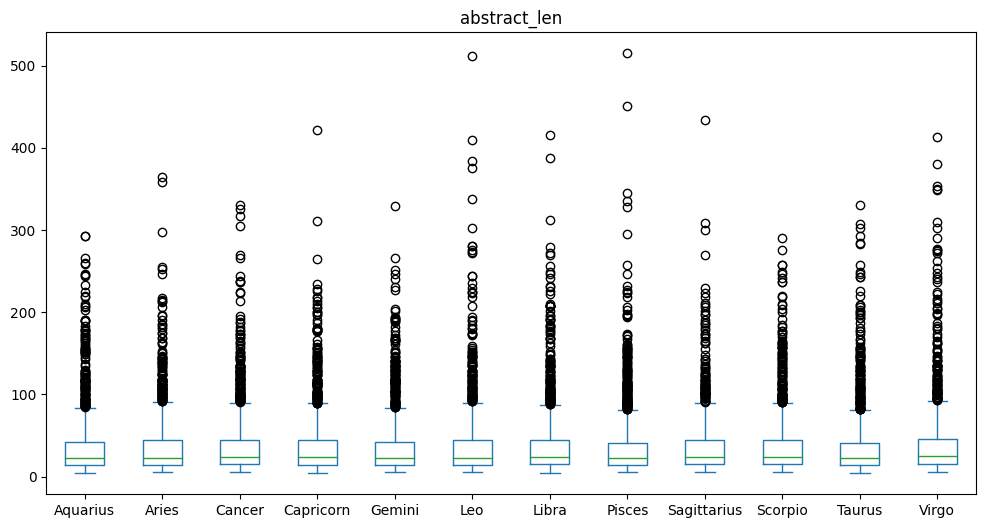

In [23]:
df[['astral_sign', 'abstract_len']].plot.box('astral_sign', figsize=(12,6))

In [100]:
import matplotlib.pyplot as plt

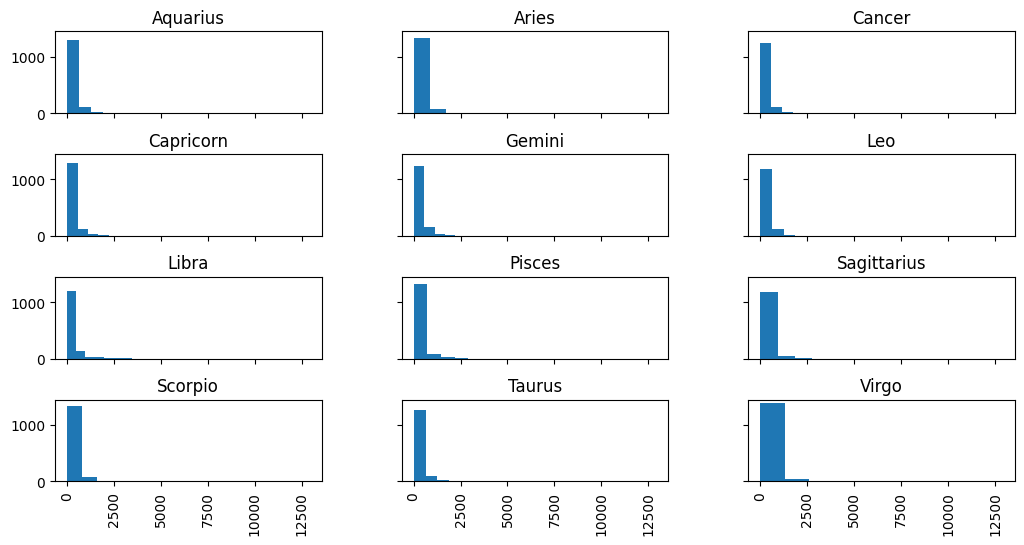

In [113]:
ax = df[['astral_sign', 'page_len']].hist(column='page_len', by='astral_sign', sharex=True, sharey=True, figsize=(12,6))

Text(0.5, 0.98, '')

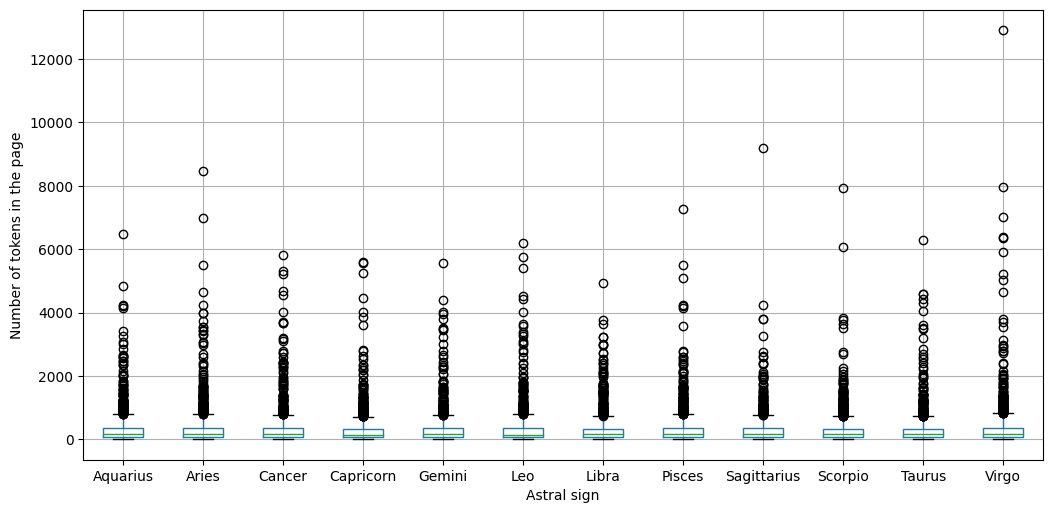

In [75]:
ax = df[['astral_sign', 'page_len']].boxplot(column='page_len', by='astral_sign', figsize=(12,6))
ax.set_xlabel(xlabel='Astral sign')
ax.set_ylabel(ylabel='Number of tokens in the page')
# ax.set_title('Distribution of the number of tokens in a page per astral sign')
ax.set_title(None)
fig = ax.get_figure()
fig.suptitle(None)
fig.savefig('figures/boxplot_page_len.pdf')

abstract_sent_len    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

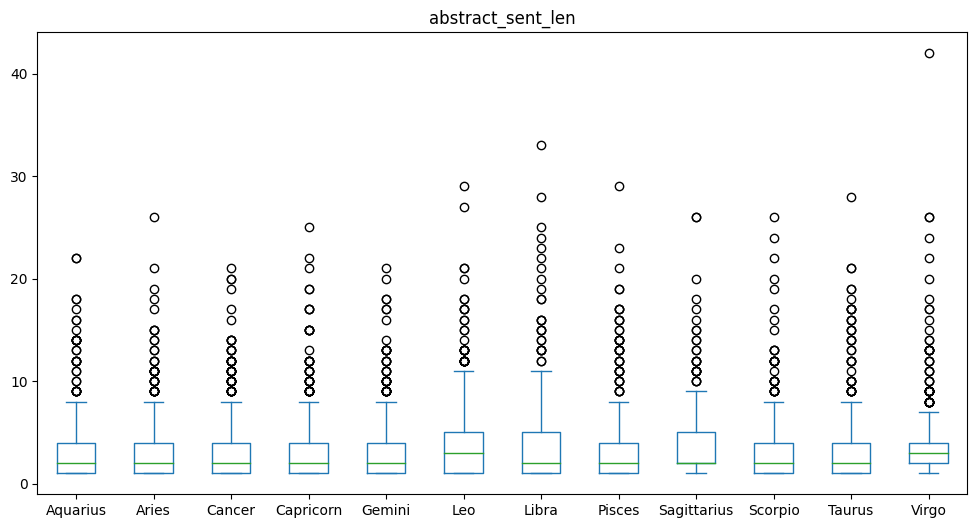

In [14]:
df[['astral_sign', 'abstract_sent_len']].plot.box('astral_sign', figsize=(12,6))

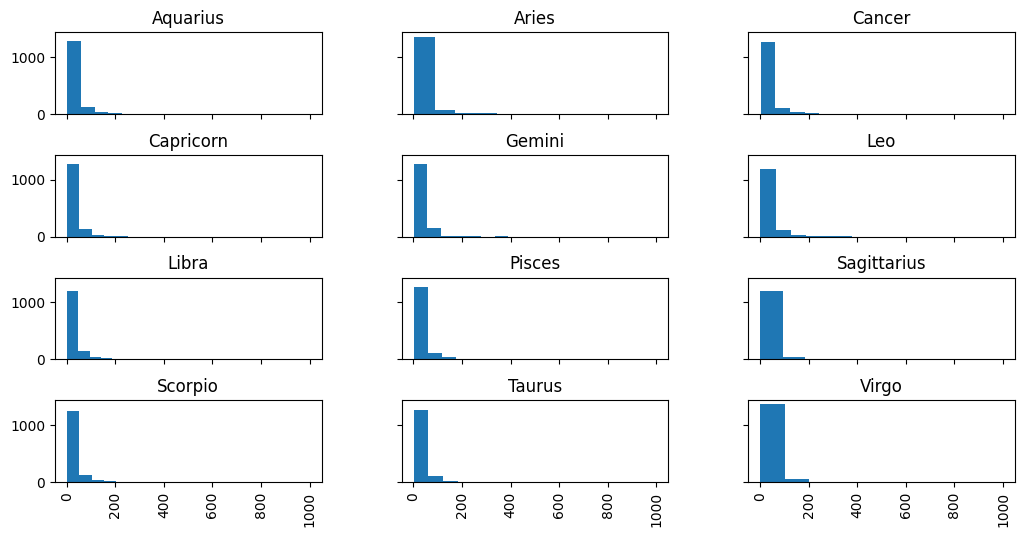

In [120]:
ax = df[['astral_sign', 'page_sent_len']].hist(column='page_sent_len', by='astral_sign', sharex=True, sharey=True, figsize=(12,6))

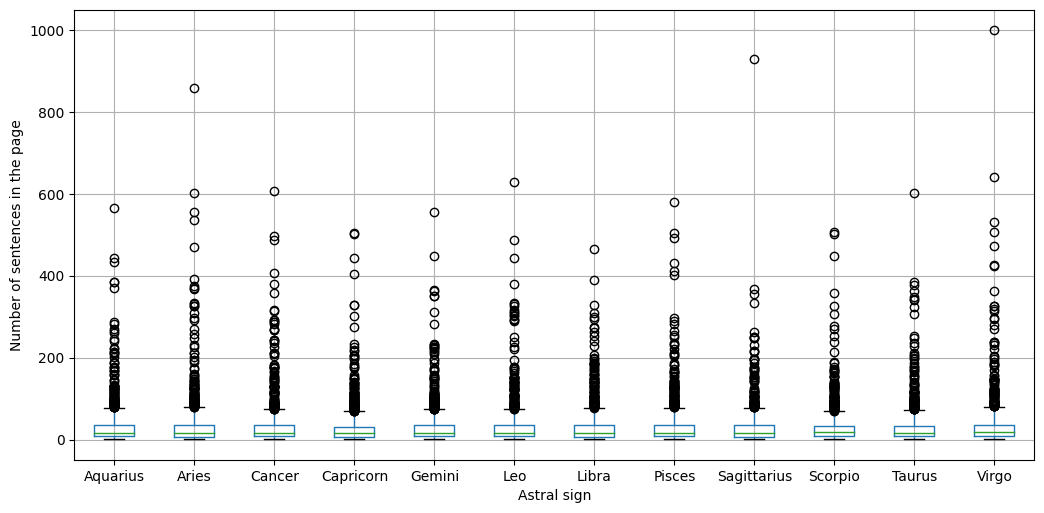

In [118]:
ax = df[['astral_sign', 'page_sent_len']].boxplot(column='page_sent_len', by='astral_sign', figsize=(12,6))
ax.set_xlabel(xlabel='Astral sign')
ax.set_ylabel(ylabel='Number of sentences in the page')
# ax.set_title('Distribution of the number of sentences in a page per astral sign')
ax.set_title(None)
fig = ax.get_figure()
fig.suptitle(None)
fig.savefig('figures/boxplot_page_sent_len.pdf')

In [121]:
def compute_freqs(df, target):
    freqs = {}
    for sign in df['astral_sign'].sort_values().unique():
        freqs[sign] = FreqDist(reduce(lambda a, b: a + b, df[df['astral_sign'] == sign][target], []))
    return freqs

def make_wordclouds(freqs):
    wc = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    fig = plt.figure(figsize=(12,9))
    tmp = {}
    for i, freq in enumerate(freqs.items()):
        sign, freq = freq
        tmp[sign] = wc.generate_from_frequencies(freq)
        fig.add_subplot(4,3,i+1)
        plt.imshow(tmp[sign])
        plt.title(sign)
    return fig

In [17]:
abstract_freqs = compute_freqs(df, 'abstract_tokens')

In [123]:
page_freqs = compute_freqs(df, 'page_tokens')

In [145]:
page_freqs.keys()

dict_keys(['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo'])

In [155]:
common_words = None
for k,v in page_freqs.items():
    if common_words == None:
        common_words = {w for w, _ in v.most_common(50)}
    else:
        common_words = common_words.intersection({w for w, _ in v.most_common(50)})
    print()
    # # print(v.most_common(50))
    # for w in v.most_common(50):
    #     if w[0] not in common_words:
    #         common_words.append(w[0])

{'references', 'made', 'career', 'august', 'president', 'film', 'member', 'team', 'american', 'states', 'including', 'cup', 'links', 'season', 'first', 'world', 'school', 'would', 'college', 'born', 'united', 'party', 'march', 'state', 'december', 'new', 'city', 'player', 'international', 'work', 'football', 'served', 'university', 'national', 'early', 'may', 'year', 'life', 'second', 'january', 'years', 'became', 'time', 'february', 'club', 'played', 'war', 'external', 'league', 'professional'}
{'references', 'made', 'career', 'film', 'member', 'team', 'american', 'album', 'links', 'season', 'first', 'world', 'april', 'school', 'would', 'college', 'born', 'united', 'party', 'march', 'state', 'new', 'city', 'player', 'death', 'work', 'international', 'football', 'served', 'july', 'series', 'university', 'national', 'early', 'may', 'year', 'life', 'second', 'york', 'family', 'january', 'years', 'became', 'time', 'club', 'played', 'war', 'external', 'known', 'league'}
{'june', 'reference

In [151]:
set(common_words)

{'album',
 'american',
 'april',
 'august',
 'award',
 'became',
 'born',
 'career',
 'championship',
 'city',
 'club',
 'college',
 'cup',
 'death',
 'december',
 'early',
 'external',
 'family',
 'february',
 'film',
 'first',
 'following',
 'football',
 'former',
 'games',
 'government',
 'including',
 'international',
 'january',
 'john',
 'july',
 'june',
 'known',
 'league',
 'life',
 'links',
 'made',
 'march',
 'match',
 'may',
 'member',
 'music',
 'national',
 'new',
 'november',
 'october',
 'party',
 'played',
 'player',
 'president',
 'professional',
 'received',
 'record',
 'references',
 'released',
 'round',
 'school',
 'season',
 'second',
 'september',
 'series',
 'served',
 'state',
 'states',
 'team',
 'time',
 'united',
 'university',
 'war',
 'work',
 'world',
 'would',
 'year',
 'years',
 'york'}

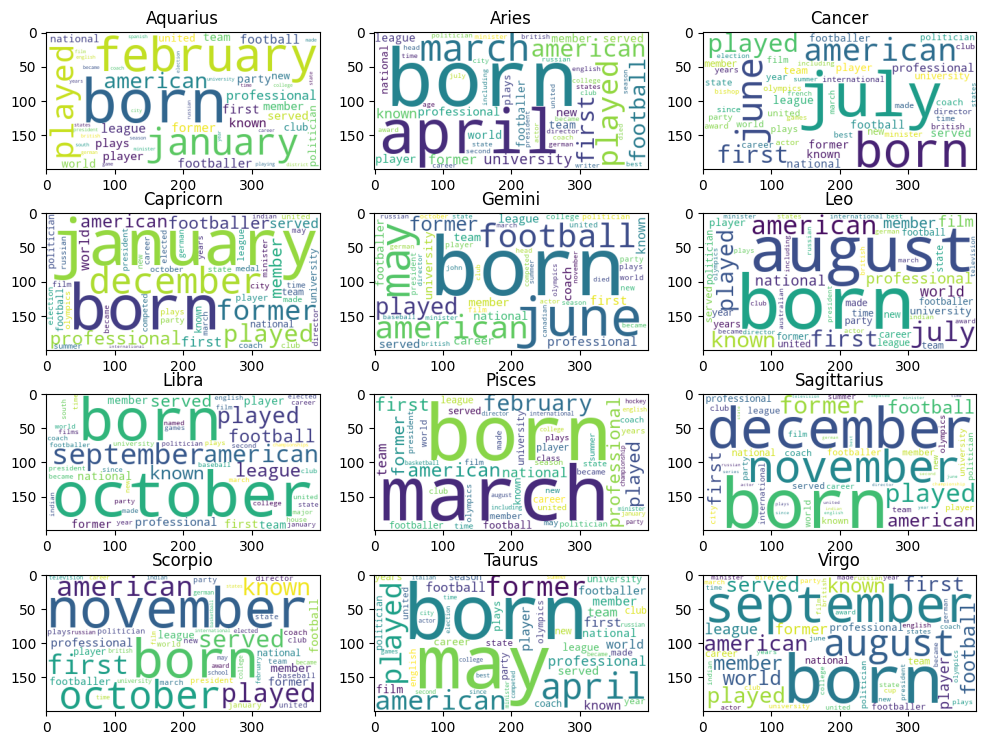

In [19]:
make_wordclouds(abstract_freqs)

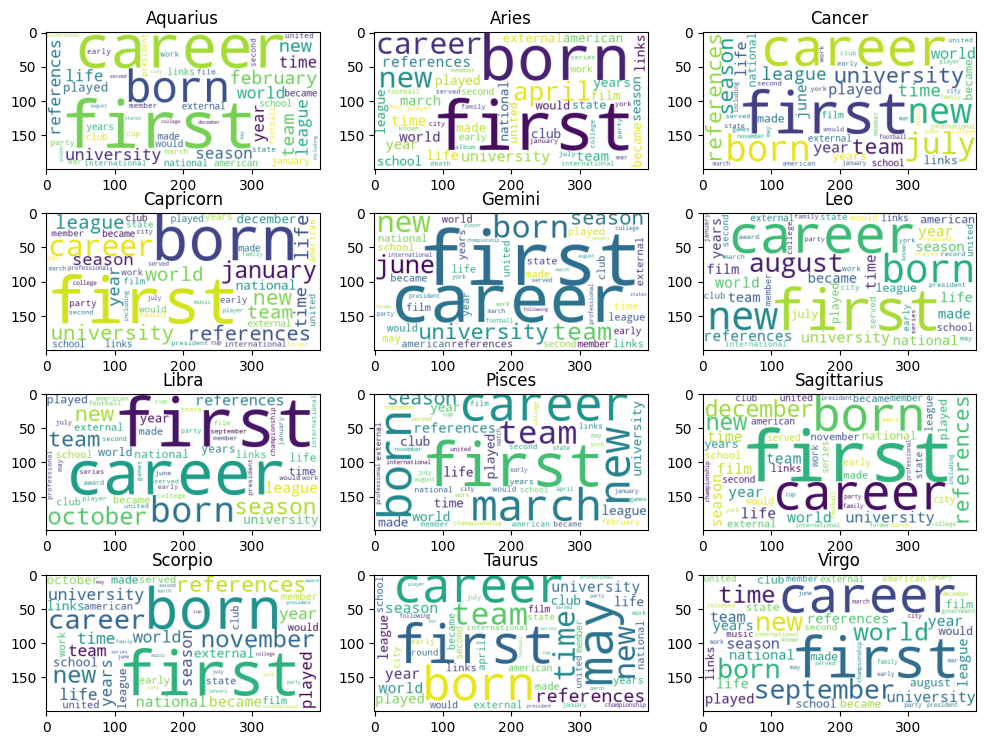

In [126]:
fig = make_wordclouds(page_freqs)
fig.savefig(f'figures/wordcloud_page_freqs.pdf')

words = reduce(lambda a, b: a | set([t.lower() for t in b]), df['tokens'], set())

print(len(vectorizer.vocabulary_), len(features), len(words))

def check(x):
    word = 'apple'
    for t in x:
        if t.lower() == word:
            print(t, x)
_ = df['tokens'].apply(check)

In [12]:
vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
X = vectorizer.fit_transform(df['page_tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()
freqs = pd.DataFrame(zip(features, np.asarray((X != 0).astype(int).mean(axis=0)).flatten()), columns=['word', 'freq'])
freqs.sort_values('freq', ascending=False)

,word,freq
116350,reference,0.941855
95675,bear,0.874289
109181,link,0.701640
103082,external,0.696443
97225,career,0.490823
...,...,...
29513,Gade,0.000162
29514,Gadegaon,0.000162
71097,Rosport,0.000162
71096,Rospil,0.000162


In [42]:
def terms_to_docs(x):
    return np.asarray((x != 0).astype(int).mean(axis=0)).flatten()

vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
vectorizer = vectorizer.fit(df['abstract_tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()

X = vectorizer.transform(df['abstract_tokens'].apply(lambda x: ' '.join(x)))
X = terms_to_docs(X)
freqs = pd.DataFrame(
    zip(features, X), 
    columns=['word', 'all_freq']    
)

for asign in df['astral_sign'].unique():
    X = vectorizer.transform(df[df['astral_sign'] == asign]['abstract_tokens'].apply(lambda x: ' '.join(x)))
    X = terms_to_docs(X)
    freqs[f'{asign}_freq'] = X

freqs.describe()

,all_freq,Cancer_freq,Leo_freq,Aquarius_freq,Taurus_freq,Sagittarius_freq,Gemini_freq,Libra_freq,Capricorn_freq,Virgo_freq,Scorpio_freq,Aries_freq,Pisces_freq
count,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000,68905.000000
mean,0.000447,0.000453,0.000461,0.000441,0.000439,0.000442,0.000430,0.000463,0.000444,0.000468,0.000444,0.000441,0.000437
std,0.004217,0.004880,0.004899,0.004828,0.004910,0.004850,0.004787,0.004952,0.004895,0.004975,0.004861,0.004745,0.004875
min,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.661032,0.676761,0.687176,0.665072,0.692745,0.660572,0.655220,0.701207,0.675120,0.695470,0.692523,0.651211,0.672426


In [ ]:
freqs[~freqs['word'].isin(MONTHS)].describe()

In [ ]:
for col in freqs.columns:
    print(col, freqs[~freqs['word'].isin(MONTHS)].sort_values(col, ascending=False)['word'][:5].values)

In [43]:
freqs[~freqs['word'].isin(MONTHS)].plot.box()

NameError: name 'MONTHS' is not defined

In [ ]:
TARGET = 'bear'
vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
X = vectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()
tindex = list(features).index(TARGET)
df[(X[:, tindex] == 0).toarray().flatten()]

# freqs = pd.DataFrame(zip(features, np.asarray((X != 0).astype(int).mean(axis=0)).flatten()), columns=['word', 'freq'])
# freqs.sort_values('freq', ascending=False)

In [ ]:
from scipy import stats

In [ ]:
stats.shapiro(df.loc[df['astral_sign']=='Taurus', ['page_len']])

ShapiroResult(statistic=0.5086058378219604, pvalue=0.0)

In [ ]:
#Tests the normality of the distribution
df[['astral_sign', 'page_len']].groupby('astral_sign').apply(lambda x: stats.shapiro(x))

astral_sign
Aquarius                          (0.6721283197402954, 0.0)
Aries           (0.6896845102310181, 1.401298464324817e-45)
Cancer          (0.6877526044845581, 2.802596928649634e-45)
Capricorn       (0.6868701577186584, 1.401298464324817e-45)
Gemini          (0.6891270875930786, 1.401298464324817e-45)
Leo                               (0.6141031980514526, 0.0)
Libra                              (0.660446047782898, 0.0)
Pisces                            (0.6127355098724365, 0.0)
Sagittarius    (0.6761871576309204, 1.0089348943138683e-43)
Scorpio          (0.694068431854248, 4.203895392974451e-45)
Taurus                            (0.6479282379150391, 0.0)
Virgo                             (0.6266867518424988, 0.0)
dtype: object

In [ ]:
#Tests the homogeneity of the variances
b= [df[df['astral_sign']==v]['page_len'].values for v in df['astral_sign'].unique()]
stats.bartlett(*b)

BartlettResult(statistic=152.51733744546553, pvalue=4.557974809733359e-27)

In [ ]:
#Tests the population median
k= [df[df['astral_sign']==v]['page_len'].values for v in df['astral_sign'].unique()]
stats.kruskal(*k)

KruskalResult(statistic=11.461282163584368, pvalue=0.40546576559794756)